In [ ]:
from google.colab import files
uploaded = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
import pandas as pd
df = pd.read_csv('AAPL.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.407747,117258400.0
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.386473,43971200.0
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.358108,26432000.0
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366972,21610400.0
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.377609,18362400.0


In [ ]:
df.shape

(9823, 7)

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9822.000000,9822.000000,9822.000000,9822.000000,9822.000000,9.822000e+03
mean,30.350057,30.640633,30.048298,30.352940,28.364033,8.620720e+07
std,53.443016,53.908364,52.983661,53.464270,51.603590,8.623138e+07
min,0.198661,0.198661,0.196429,0.196429,0.156008,3.472000e+05
25%,1.062500,1.085357,1.043571,1.066964,0.914089,3.318138e+07
50%,1.709286,1.742366,1.671429,1.712857,1.452872,5.798940e+07
75%,30.393928,30.555714,29.865358,30.233214,26.305946,1.076320e+08
max,267.899994,268.000000,265.390015,267.100006,267.100006,1.855410e+09


In [ ]:
df.isnull().sum()

,0
Date,0
Open,1
High,1
Low,1
Close,1
Adj Close,1
Volume,1


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.dropna(inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9822 entries, 0 to 9822
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9822 non-null   object 
 1   Open       9822 non-null   float64
 2   High       9822 non-null   float64
 3   Low        9822 non-null   float64
 4   Close      9822 non-null   float64
 5   Adj Close  9822 non-null   float64
 6   Volume     9822 non-null   float64
dtypes: float64(6), object(1)
memory usage: 613.9+ KB


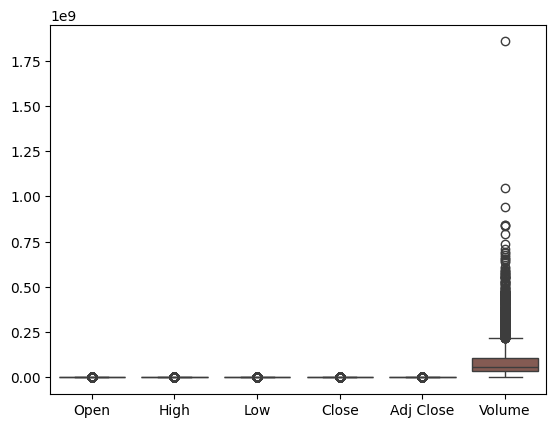

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(df)
plt.show()

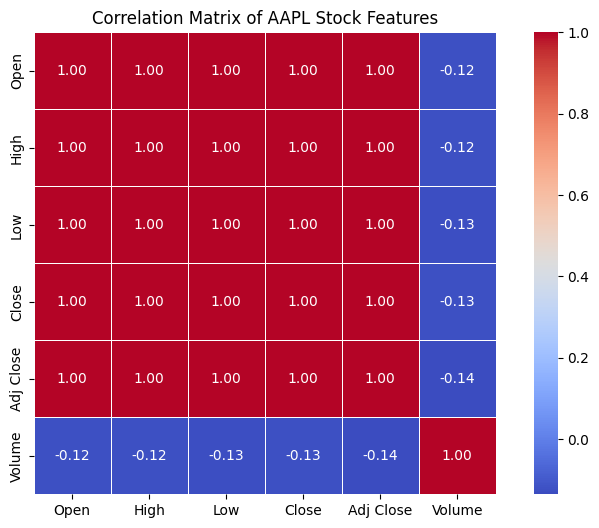

In [ ]:
df_new = df.drop(['Date'], axis = 1)
corr_matrix = df_new.corr()

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Matrix of AAPL Stock Features")
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, SimpleRNN, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import GridSearchCV

In [ ]:
# Convert Date to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
df_scaled = scaler.fit_transform(df[['Adj Close']])

In [ ]:
df_scaled

array([[9.43040495e-04],
       [8.63345877e-04],
       [7.57087635e-04],
       ...,
       [9.80932345e-01],
       [9.80070700e-01],
       [9.97265303e-01]])

In [ ]:
# Create sequences for training
def create_sequences(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i+time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 60
X, y = create_sequences(df_scaled, time_step)


In [ ]:
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [ ]:
#  Build and Train RNN Model
def build_rnn(input_shape):
    model = Sequential([
        SimpleRNN(50, activation='tanh', input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

#  Build and Train LSTM Model
def build_lstm(input_shape):
    model = Sequential([
        LSTM(50, return_sequences=False, input_shape=input_shape),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Training Function
def train_model(model, X_train, y_train):
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = model.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=20,
        batch_size=8,
        callbacks=[es],
        verbose=1
    )
    return history

In [ ]:
print("X_test shape:", X_test.shape)
print("X_train shape:", X_train.shape)

X_test shape: (1953, 60, 1)
X_train shape: (7808, 60, 1)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


781/781 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 2.2927e-04 - val_loss: 1.9166e-04
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 2.0478e-06 - val_loss: 2.6557e-05
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.3289e-06 - val_loss: 1.3774e-05
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 7.4443e-07 - val_loss: 1.0790e-05
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 7.0236e-07 - val_loss: 1.0087e-05
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.4835e-07 - val_loss: 1.5570e-05
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 4.8794e-07 - val_loss: 8.6523e-06
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 5.2471e-07 - val_loss: 7.8922e-06
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.3283e-07 - val_loss: 1.1557e-05
Epoch 10/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.7380e-07 - val_loss: 1.7992e-05
Epoch 11/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - loss: 4.7766e-0

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


781/781 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 6.6307e-06 - val_loss: 2.2041e-05
Epoch 2/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - loss: 6.1677e-07 - val_loss: 1.1050e-05
Epoch 3/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 5.6078e-07 - val_loss: 1.3016e-05
Epoch 4/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 6.4185e-07 - val_loss: 3.3689e-05
Epoch 5/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 4.1780e-07 - val_loss: 1.2142e-05
Epoch 6/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 5.2370e-07 - val_loss: 1.5802e-05
Epoch 7/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 4.4833e-07 - val_loss: 3.6179e-05
Epoch 8/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 5.1055e-07 - val_loss: 1.4509e-05
Epoch 9/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - loss: 4.3728e-07 - val_loss: 9.5059e-06
Epoch 10/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 3.7126e-07 - val_loss: 7.2845e-06
Epoch 11/20
781/781 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 3.7447

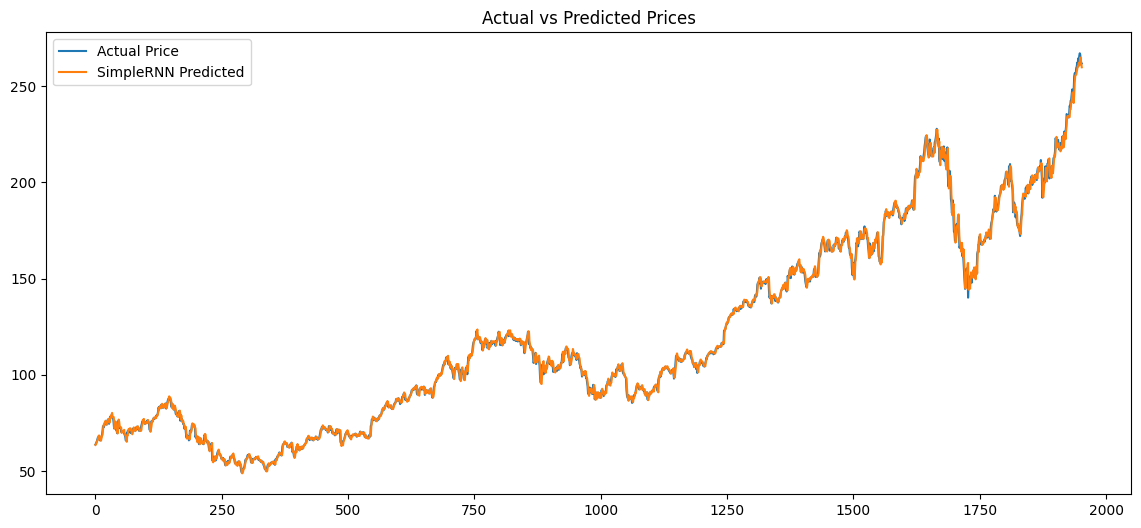

SimpleRNN MSE: 4.860777269312148
LSTM MSE: 8.25910908272803


In [ ]:
# Make predictions
# RNN
rnn_model = build_rnn(X_train.shape[1:])
train_model(rnn_model, X_train, y_train)
rnn_preds = rnn_model.predict(X_test)
y_test = y_test.reshape(-1, 1)
rnn_mse = mean_squared_error(y_test, rnn_preds)

    # LSTM
lstm_model = build_lstm(X_train.shape[1:])
train_model(lstm_model, X_train, y_train)
lstm_preds = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_preds)

# Inverse transform to original prices
rnn_preds_inv = scaler.inverse_transform(rnn_preds.reshape(-1,1))
lstm_preds_inv = scaler.inverse_transform(lstm_preds.reshape(-1,1))
y_test_inv = scaler.inverse_transform(y_test)

# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(rnn_preds_inv, label='SimpleRNN Predicted')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

# Calculate MSE
print("SimpleRNN MSE:", mean_squared_error(y_test_inv, rnn_preds_inv))
print("LSTM MSE:", mean_squared_error(y_test_inv, lstm_preds_inv))


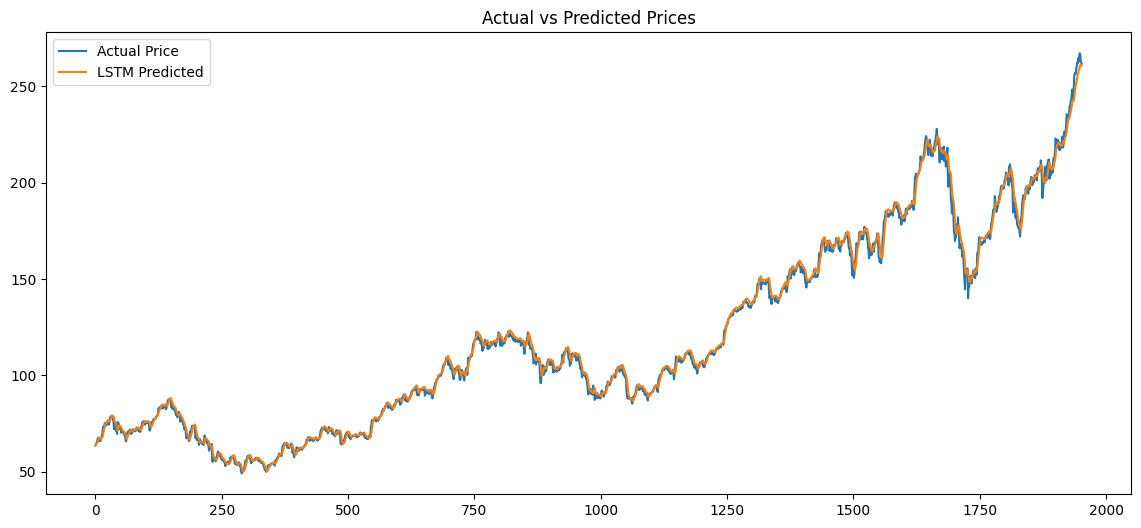

In [ ]:
# Plot actual vs predicted
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual Price')
plt.plot(lstm_preds_inv, label='LSTM Predicted')
plt.legend()
plt.title("Actual vs Predicted Prices")
plt.show()

In [ ]:
def predict_future(model, last_sequence, days=1):
    sequence = last_sequence.copy()
    future_preds = []
    for _ in range(days):
        pred = model.predict(sequence.reshape(1, 60, 1))
        future_preds.append(pred[0][0])
        sequence = np.append(sequence[1:], pred)
    return scaler.inverse_transform(np.array(future_preds).reshape(-1, 1))

# Get last 60 days
last_60_days = df_scaled[-60:]

# Predict next 1, 5, and 10 days
future_1 = predict_future(rnn_model, last_60_days, 1)
future_5 = predict_future(rnn_model, last_60_days, 5)
future_10 = predict_future(rnn_model, last_60_days, 10)

print("Next 1 day prediction:", future_1.flatten())
print("Next 5 days prediction:", future_5.flatten())
print("Next 10 days prediction:", future_10.flatten())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Next 1 day prediction: [262.94003]
Next 5 days prediction: [262.94003 260.97137 258.50046 256.28235 254.09268]
Next 10 days prediction: [262.94003 260.97137 258.50046 256.28235 254.09268 251.60265 249.43355
 246.66534 244.51271 242.14032]
